Ben Resek
1/29/2023

In [9]:
from rasterio.merge import merge
from rasterio.plot import show
import rasterio as rio
from pathlib import Path
from utility_function import mosaic_list_of_rasters
from riverrem.REMMaker import REMMaker


In [17]:
# dem data is from https://apps.nationalmap.gov/lidar-explorer/#/

## Mosiacing dem

Trying to combine rasters. It seems like it's pretty hard to do basic stuff in python for gis.

I'm following this tutorial: https://medium.com/spatial-data-science/how-to-mosaic-merge-raster-data-in-python-fb18e44f3c8

In [18]:
data_path = Path('data/')
Path('output').mkdir(parents=True, exist_ok=True)
output_path = 'output/mosaic_output.tif'

In [19]:
# Get a list of raster file paths in data folder
raster_files = list(data_path.iterdir())

raster_to_mosiac = []

In [20]:
for rf in raster_files:
    raster = rio.open(rf)
    raster_to_mosiac.append(raster)

In [29]:
mosiac, output = merge(raster_to_mosiac)

Create metadata for raster

In [39]:
# create metadata
output_meta = raster.meta.copy()
output_meta.update(
    {"driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": output,
    }
)

In [40]:
# save mosiac to output path
with rio.open(output_path, "w", **output_meta) as m:
    m.write(mosiac)

# Make an Color hillshade


In [61]:
from riverrem.REMMaker import REMMaker
from riverrem.RasterViz import RasterViz

rem_maker = RasterViz(dem=output_path, out_dir="output")
rem_maker.make_hillshade_color(cmap='mako_r')
#rem_maker.make_rem_viz(cmap="mako_r")


Making hillshade-color composite raster.
Tiling and compressing raster.
Saved output/mosaic_output_hillshade-color.tif.


'output/mosaic_output_hillshade-color.tif'

In [62]:
hillshade_color =rio.open('output/mosaic_output_hillshade-color.tif')

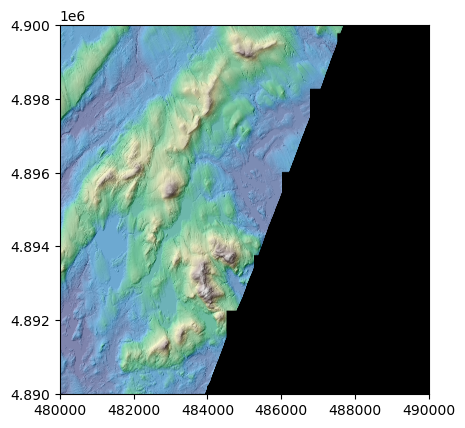

<AxesSubplot: >

In [63]:
show(hillshade_color)

## REM of boston


In [67]:
from riverrem.REMMaker import REMMaker

rem_maker = REMMaker(
    dem="data/USGS_1M_19_x32y470_MA_CentralEastern_2021_B21.tif",
    out_dir="output"
                    )
rem_maker.make_rem()


[INFO] 2023-01-29 16:42:03,342 - Getting DEM projection.
[INFO] 2023-01-29 16:42:03,351 - Reading DEM as array.
[INFO] 2023-01-29 16:42:06,437 - Getting DEM bounds.
[INFO] 2023-01-29 16:42:06,442 - Mapping array indices to coordinates.
[INFO] 2023-01-29 16:42:06,475 - Finding river centerline.
/Users/benresek/opt/anaconda3/envs/rem_python/lib/python3.11/site-packages/geopandas/tools/clip.py:67: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
[INFO] 2023-01-29 16:42:10,359 - Found river(s): Hyde Brook, Charles River, Little River, Muddy River, Mystic River, Stony Brook, Wellington Brook, Winter Brook, Alewife Brook, Mill Brook, Malden River, Miller's River
[INFO] 2023-01-29 16:42:10,360 - 
River lengths:
[INFO] 2023-01-29 16:42:10,361 - 	Hyde Brook: 167


Making multidirectional hillshade raster.
Tiling and compressing raster.
Saved ./.cache/USGS_1M_19_x32y470_MA_CentralEastern_2021_B21_hillshade.tif.

Making color relief map with cmap=mako_r.
Tiling and compressing raster.
Saved ./.cache/USGS_1M_19_x32y470_MA_CentralEastern_2021_B21_REM_color-relief.tif.

Generating .png file.
Saved ./.cache/USGS_1M_19_x32y470_MA_CentralEastern_2021_B21_REM_color-relief.png.

Making hillshade-color composite raster.
Tiling and compressing raster.
Saved output/USGS_1M_19_x32y470_MA_CentralEastern_2021_B21_hillshade-color.tif.

Generating .png file.
Saved output/USGS_1M_19_x32y470_MA_CentralEastern_2021_B21_hillshade-color.png.


'output/USGS_1M_19_x32y470_MA_CentralEastern_2021_B21_hillshade-color.tif'

## REM of Boston mosiac

In [5]:
# Get list of rasters
boston_path = Path('data/boston')
raster_files = list(boston_path.iterdir())x

[PosixPath('data/boston/USGS_1M_19_x32y469_MA_CentralEastern_2021_B21.tif'),
 PosixPath('data/boston/USGS_1M_19_x32y470_MA_CentralEastern_2021_B21.tif'),
 PosixPath('data/boston/USGS_1M_19_x33y469_MA_CentralEastern_2021_B21.tif'),
 PosixPath('data/boston/USGS_1M_19_x33y470_MA_CentralEastern_2021_B21.tif')]

In [6]:
boston_mosaic = "output/boston_mosaic.tiff"
mosaic_list_of_rasters(raster_files, boston_mosaic )

array([[[49.814274, 49.783833, 49.773323, ..., -1.762   , -1.762   ,
         -1.762   ],
        [49.800423, 49.781376, 49.7661  , ..., -1.762   , -1.762   ,
         -1.762   ],
        [49.780636, 49.777905, 49.774094, ..., -1.762   , -1.762   ,
         -1.762   ],
        ...,
        [28.735126, 28.676428, 28.654652, ..., -1.6269  , -1.6269  ,
         -1.6269  ],
        [28.692327, 28.644215, 28.62082 , ..., -1.6269  , -1.6269  ,
         -1.6269  ],
        [28.67293 , 28.6273  , 28.595194, ..., -1.6269  , -1.6269  ,
         -1.6269  ]]], dtype=float32)

In [ ]:

rem_maker = REMMaker(
    dem=boston_mosaic,
    out_dir="output"
                    )
rem_maker.make_rem()

rem_maker.make_rem_viz(cmap="mako_r")

[INFO] 2023-01-29 17:25:38,147 - Getting DEM projection.
[INFO] 2023-01-29 17:25:38,284 - Reading DEM as array.
[INFO] 2023-01-29 17:25:44,459 - Getting DEM bounds.
[INFO] 2023-01-29 17:25:44,563 - Mapping array indices to coordinates.
[INFO] 2023-01-29 17:25:44,586 - Finding river centerline.
/Users/benresek/opt/anaconda3/envs/rem_python/lib/python3.11/site-packages/geopandas/tools/clip.py:67: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
[INFO] 2023-01-29 17:25:53,356 - Found river(s): Sawmill Brook, Wellington Brook, Miller's River, Unquity Brook, Pine Tree Brook, Furnace Brook, Chelsea River, Hyde Brook, Stony Brook, Woodman Brook, Little River, Bussey Brook, Muddy River, Stony Brook Roslindale Branch, Winter Brook, Gulliver Creek, Goldsmith Broo

and contains "waterway" and "name" tags: https://www.openstreetmap.org/edit


[INFO] 2023-01-29 17:26:05,174 - Interpolating river elevation across DEM extent.
[INFO] 2023-01-29 17:26:05,177 - Estimating k.
[INFO] 2023-01-29 17:26:05,183 - Guessing k = 33
[INFO] 2023-01-29 17:26:05,184 - Using k = 33 nearest neighbors.
[INFO] 2023-01-29 17:26:11,795 - Getting coords of points to interpolate.


## Read in street network from osmnx